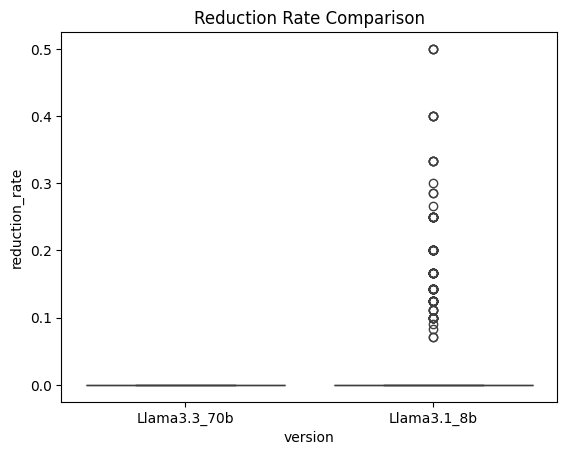

In [12]:
# reduction rate lecxical comparison
from scipy.stats import wilcoxon, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设两个文件分别是：
df1 = pd.read_csv("/Users/phoebeeeee/ongoing/Beyond-noise/2_llm_validation/500/LLM_exp+LLM_dist+LLM_validate/llama_70b/llama33_70b_generation_new_raw/summary_lexical_n123.csv")  # baseline 或方法1
df2 = pd.read_csv("/Users/phoebeeeee/ongoing/Beyond-noise/2_llm_validation/500/LLM_exp+LLM_dist+LLM_validate/llama-8b/llama_3.1_generation_raw/summary_lexical_n123.csv")  # 改进方法或方法2

# 给 reduction_rate 重命名以区分
df1 = df1.rename(columns={"reduction_rate": "Llama3.3_70b"})
df2 = df2.rename(columns={"reduction_rate": "Llama3.1_8b"})

df = pd.merge(df1, df2, on=["folder", "file"])
# df["delta"] = df["Llama3.1_8b"] - df["Llama3.3_70b"]

df_melt = df.melt(id_vars=["folder", "file"], value_vars=["Llama3.3_70b", "Llama3.1_8b"],
                  var_name="version", value_name="reduction_rate")

sns.boxplot(x="version", y="reduction_rate", data=df_melt)
plt.title("Reduction Rate Comparison")
plt.show()

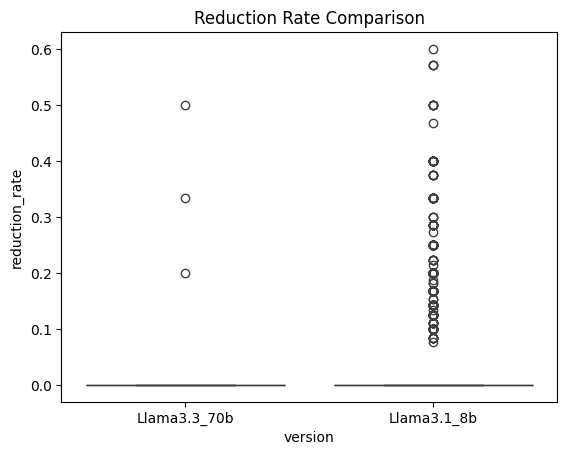

In [10]:
# reduction rate pos tag comparison
from scipy.stats import wilcoxon, ttest_rel
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 假设两个文件分别是：
df1 = pd.read_csv("/Users/phoebeeeee/ongoing/Beyond-noise/2_llm_validation/500/LLM_exp+LLM_dist+LLM_validate/llama_70b/llama33_70b_generation_new_raw/summary_postag_n123.csv")  # baseline 或方法1
df2 = pd.read_csv("/Users/phoebeeeee/ongoing/Beyond-noise/2_llm_validation/500/LLM_exp+LLM_dist+LLM_validate/llama-8b/llama_3.1_generation_raw/summary_postag_n123.csv")  # 改进方法或方法2

# 给 reduction_rate 重命名以区分
df1 = df1.rename(columns={"reduction_rate": "Llama3.3_70b"})
df2 = df2.rename(columns={"reduction_rate": "Llama3.1_8b"})

df = pd.merge(df1, df2, on=["folder", "file"])
# df["delta"] = df["Llama3.1_8b"] - df["Llama3.3_70b"]

df_melt = df.melt(id_vars=["folder", "file"], value_vars=["Llama3.3_70b", "Llama3.1_8b"],
                  var_name="version", value_name="reduction_rate")

sns.boxplot(x="version", y="reduction_rate", data=df_melt)
plt.title("Reduction Rate Comparison")
plt.show()

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import os

# 配置 matplotlib 显示
sns.set(style="whitegrid")
plt.rcParams["figure.dpi"] = 120

# === 路径设置 ===
csv_path = "/Users/phoebeeeee/ongoing/Beyond-noise/2_llm_validation/500/LLM_exp+LLM_dist+LLM_validate/llama-8b/llama_3.1_generation_raw/summary_sentence_embedding.csv"   # <-- 替换为你的路径
output_dir = "plots_similarity_analysis"
os.makedirs(output_dir, exist_ok=True)

# === 读取数据 ===
df = pd.read_csv(csv_path)

# === 提取标签（E/N/C）===
df["label"] = df["file"].str[0]

# === KDE 分布图：Mean Similarities ===
plt.figure()
sns.kdeplot(df["mean_sim_original"], label="Original", fill=True)
sns.kdeplot(df["mean_sim_filtered"], label="Filtered", fill=True)
plt.title("Distribution of Mean Pairwise Similarities")
plt.xlabel("Mean Similarity")
plt.legend()
plt.tight_layout()
plt.savefig(f"{output_dir}/kde_similarity.png")
plt.close()

# === Boxplot of similarity_drop ===
plt.figure()
sns.boxplot(y=df["similarity_drop"])
plt.title("Similarity Drop after Deduplication")
plt.ylabel("Similarity Drop")
plt.tight_layout()
plt.savefig(f"{output_dir}/boxplot_similarity_drop.png")
plt.close()

# === Scatter plot: reduction vs sim drop ===
plt.figure()
sns.scatterplot(x="reduction_rate", y="similarity_drop", hue="label", data=df)
plt.title("Reduction Rate vs. Similarity Drop")
plt.xlabel("Reduction Rate")
plt.ylabel("Similarity Drop")
plt.legend(title="Label")
plt.tight_layout()
plt.savefig(f"{output_dir}/scatter_reduction_vs_similarity_drop.png")
plt.close()

# === 计算相关性 ===
pearson_r, _ = pearsonr(df["reduction_rate"], df["similarity_drop"])
spearman_r, _ = spearmanr(df["reduction_rate"], df["similarity_drop"])
print(f"📈 Pearson r = {pearson_r:.3f}, Spearman r = {spearman_r:.3f}")

# === 聚合统计（按标签）===
agg = df.groupby("label")[["original_count", "retained_count", "reduction_rate", "similarity_drop"]].mean()
print("\n📊 Per-label summary:\n")
print(agg.round(3))

agg.to_csv(f"{output_dir}/label_wise_summary.csv")
print(f"\n✅ 所有图和表格已保存到: {output_dir}/")


📈 Pearson r = 0.621, Spearman r = 0.828

📊 Per-label summary:

       original_count  retained_count  reduction_rate  similarity_drop
label                                                                 
C               5.536           5.296           0.044            0.013
E               5.312           4.968           0.067            0.018
N               5.684           5.434           0.046            0.012

✅ 所有图和表格已保存到: plots_similarity_analysis/


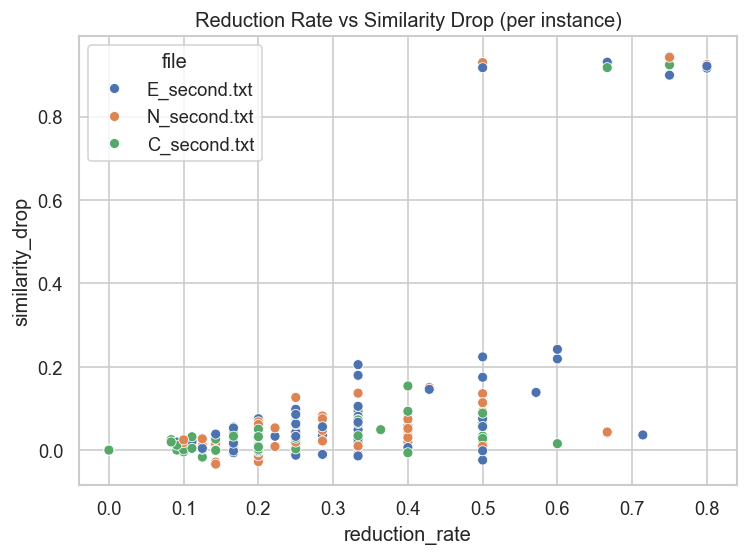

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/phoebeeeee/ongoing/Beyond-noise/2_llm_validation/500/LLM_exp+LLM_dist+LLM_validate/llama-8b/llama_3.1_generation_raw/summary_sentence_embedding.csv")

sns.scatterplot(data=df, x="reduction_rate", y="similarity_drop", hue="file")
plt.title("Reduction Rate vs Similarity Drop (per instance)")
plt.tight_layout()
plt.savefig("reduction_vs_similarity_drop.png")



In [20]:
import pandas as pd

# 替换为你的实际路径
csv_path = "/Users/phoebeeeee/ongoing/Beyond-noise/2_llm_validation/500/LLM_exp+LLM_dist+LLM_validate/llama_70b/llama33_70b_generation_new_raw/summary_sentence_embedding.csv"

# 读取 CSV 文件
df = pd.read_csv(csv_path)

# 去除缺失值并计算平均值
mean_sim_drop = df['similarity_drop'].dropna().mean()

print(f"📉 Average similarity_drop: {mean_sim_drop:.4f}")


📉 Average similarity_drop: 0.0071
